![header](https://i.imgur.com/I4ake6d.jpg)

***
<center><h1> Polygon Extractor Using the Copernicus Marine Toolbox </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***


# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. Import the required libraries](#2.-Import-the-required-libraries)
- [3. Load polygon, extract data and apply spatial clip](#3.-Load-polygon,-extract-data-and-apply-spatial-clip)
- [4. Visualize the clipped dataset (optional)](#4.-Visualize-the-clipped-dataset-(optional))
- [5. Conclusion](#5.-Conclusion)

# 1. Introduction

[Go back to the "Table of contents"](#table-of-contents)


This notebook demonstrates how to extract Copernicus Marine data within the boundaries of a polygon defined in a vector file format such as ``.geojson``, ``.shp``, ``.gpkg``, or ``.kml``.
By using the geometry of the polygon, the dataset is spatially subsetted to retain only the relevant area.

In this example, we focus on the French coastline, and illustrate how to download and process the eastward (uo) and northward (vo) sea water velocity variables using the product ``GLOBAL_ANALYSISFORECAST_PHY_001_024``, specifically the dataset ``cmems_mod_glo_phy_anfc_0.083deg_P1D-m``.

# 2. Import the required libraries
[Go back to the "Table of contents"](#Table-of-contents)

We start by importing all necessary libraries to read vector files, handle NetCDF data, perform clipping, and visualize the data.

| Module name | Description |
| :---: | :---|
|**Copernicus Marine Toolbox**| [Copernicus Marine Toolbox](https://toolbox-docs.marine.copernicus.eu/en/v2.0.1/) facilitates access, analysis, and visualization of Copernicus Marine data.|
|**geopandas**| [GeoPandas](https://geopandas.org/en/stable/) is a powerful package for working with geospatial data in tabular form.|
|**xarray**| [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes.| 
| **netCDF4** | [netCDF4](https://unidata.github.io/netcdf4-python/) is a Python interface to the netCDF C library.|
|**rioxarray**| [rioxarray](https://corteva.github.io/rioxarray/stable/) enables geospatial raster operations in xarray.|
|**matplotlib**| [matplotlib](https://matplotlib.org/) is a library for creating static, animated, and interactive visualizations in Python.|

📝 Note: Make sure the file ``functions_polygons.py`` is present in the same directory as this notebook.
This file contains all the necessary functions used throughout the notebook. \
The file is available in the [Git repository](https://github.com/mercator-ocean/copernicus-marine-toolbox/tree/main/doc/usage), but you can also download it directly from [this link](https://atlas.mercator-ocean.fr/s/KHi5GiLy47C8k5k).

In [6]:
import os 
from copernicusmarine import open_dataset
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt


from functions_polygons import extract_clipped_dataset

# 3. Load polygon, extract data and apply spatial clip  

[Go back to the "Table of contents"](#Table-of-contents)

In this step, we call the function ``extract_clipped_dataset`` defined in `functions_polygons.py` to load the polygon file, extract the corresponding Copernicus Marine data for the specified variables, time range, and depth range, and apply the polygon as a spatial clip.

Note: If this is your first time using the ``copernicusmarine`` package, you will be prompted to insert your Copernicus Marine username and password ([request yours here, it's free](https://help.marine.copernicus.eu/en/articles/4220332-how-to-sign-up-for-copernicus-marine-service)). If you want to avoid entering your credentials every time, we recommend following [this guide](https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction#h_9172b5c79a) to save them.

#### 🔹 Steps of the ``extract_clipped_dataset`` function:

1. Loads a polygon file and extracts its **minimum bounding box**.
2. Downloads a **subset of data** from the Copernicus Marine dataset within the bounding box using the Toolbox.
3. **Creates a clip** from the provided polygons and applies it to the dataset.
4. Returns the result as an ``xarray.Dataset``. If ``OUTPUT_FILE`` is provided, it also encodes and saves the dataset as a NetCDF (``.nc``) file.

#### 🔹 Parameters:

1. **`polygon_file`** (*str*): Path to the file containing the polygons ( e.g. ``.geojson``, ``.shp``, ``.gpkg``, or ``.kml``).
2. **`dataset_id`** (*str*): Copernicus Marine dataset ID to download.  
3. **`variables`** (*list*): List of variables to extract.  
4. **`start_date`** (*str*): Start date (format `YYYY-MM-DD`).  
5. **`end_date`** (*str*): End date (format `YYYY-MM-DD`).  
6. **`min_depth`** (*float, optional*): Minimum depth (in meters), set to None to disable.  
7. **`max_depth`** (*float, optional*): Maximum depth (in meters), set to None to disable.  
8. **`output_file`** (*str, optional*): Output file name to save the clipped dataset, set to None to disable.

#### 🔹 Returns:
- **`clipped_data`** (*xarray.Dataset*):  
  - Returned the final result as an ``xarray.Dataset``, and if ``OUTPUT_FILE`` is set, it also saves it as a NetCDF (``.nc``) file.

In [7]:
clipped_data = extract_clipped_dataset(
    polygon_file="french_coast.geojson", # Path to the file containing the polygons  
    dataset_id='cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m', # Copernicus Marine dataset ID to download
    variables=['uo','vo'], # List of variables to extract  
    start_date='2025-02-06', #: Start date (format `YYYY-MM-DD
    end_date='2025-02-14', # End date (format `YYYY-MM-DD`)    
    min_depth=0, # Minimum depth (in meters), Set to None to disable.
    max_depth=100, # Maximum depth (in meters), Set to None to disable
    output_file="dataset_french_coast.nc" # Output file name to save the clipped dataset, Set to None to disable.
)

INFO - 2025-04-18T10:04:46Z - Selected dataset version: "202406"
INFO - 2025-04-18T10:04:46Z - Selected dataset part: "default"
WARNING - 2025-04-18T10:04:48Z - Some of your subset selection [0, 100] for the depth dimension exceed the dataset coordinates [0.49402499198913574, 5727.9169921875]


Dataset successfully saved at: dataset_french_coast.nc
Dataset was successfully clipped and is ready for use.


# 4. Visualize the clipped dataset (optional)

[Go back to the "Table of contents"](#Table-of-contents)

This step is **optional** and allows to **preview the clipped dataset**.  
It selects the first available variable, time and depth index (if applicable) and displays the data using a color map.  
This visualization helps verify that the clipping process has been applied correctly.

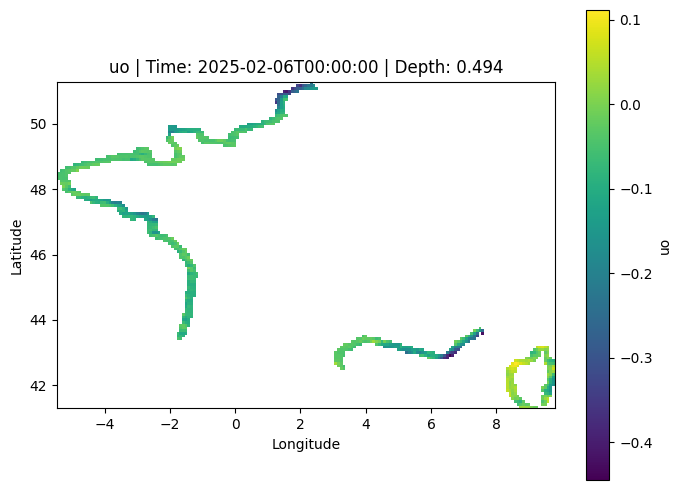

In [8]:
var_name = next(iter(clipped_data.data_vars))
da = clipped_data[var_name].isel(time=0, depth=0, missing_dims="ignore")

time = str(da.time.values)[:19] if "time" in da.coords else "N/A"
depth = round(da.depth.values.item(), 3) if "depth" in da.coords else "Surface"

plt.figure(figsize=(7, 5))
plt.pcolormesh(da.longitude, da.latitude, da.values, shading='auto')
plt.colorbar(label=var_name)
plt.title(f"{var_name} | Time: {time} | Depth: {depth}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


# 5. Conclusion

In this notebook, you learned how to access and extract CMEMS data over specific geographic areas using polygon clips. And you explored how to visualize the extracted data effectively.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>

Thank you for your attention! :) 
    
We hope you enjoyed this Jupyter Notebook on polygon extraction.

You now have all the tools to load polygons defined in a vector file, apply spatial clips, and extract relevant data from datasets. Feel free to re-use and adapt any of the Python scripts from this notebook to suit your needs!

We’d love to hear your feedback on how we can improve it — whether it's about the topics, tools, clarity, pacing, or overall structure.  

If you have any questions, don’t hesitate to reach out to us at [servicedesk.cmems@mercator-ocean.eu](mailto:servicedesk.cmems@mercator-ocean.eu)!
</div>